In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS

In [2]:
main_df = pd.read_csv("processed_netflix_data.csv")

Conversion of Dates, Rearranging DataFrame

In [3]:
main_df = main_df.applymap(lambda x:x.strip() if isinstance(x,str) else x)

main_df["date_added"] = pd.to_datetime(main_df["date_added"])

main_df["year"] = main_df["date_added"].dt.year
main_df["month"] = main_df["date_added"].dt.month
main_df["week"] = main_df["date_added"].dt.strftime("%U")

main_df["release_year"]= pd.to_datetime(main_df["release_year"].astype("str")+"-01-01")

main_df = main_df.iloc[:,[0,1,2,3,4,5,6,7,11,12,13,8,9,10]]

<ipython-input-3-9cd53c145763>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  main_df = main_df.applymap(lambda x:x.strip() if isinstance(x,str) else x)


In [4]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201837 entries, 0 to 201836
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       201837 non-null  object        
 1   director      201837 non-null  object        
 2   cast          201837 non-null  object        
 3   country       201731 non-null  object        
 4   genre         201837 non-null  object        
 5   type          201837 non-null  object        
 6   title         201837 non-null  object        
 7   date_added    201837 non-null  datetime64[ns]
 8   year          201837 non-null  int32         
 9   month         201837 non-null  int32         
 10  week          201837 non-null  object        
 11  release_year  201837 non-null  datetime64[ns]
 12  rating        201837 non-null  object        
 13  duration      201837 non-null  int64         
dtypes: datetime64[ns](2), int32(2), int64(1), object(9)
memory usage: 20

In [5]:
main_df.head(10)

,show_id,director,cast,country,genre,type,title,date_added,year,month,week,release_year,rating,duration
0,s1,Kirsten Johnson,David Attenborough,United States,Documentaries,Movie,Dick Johnson Is Dead,2021-09-25,2021,9,38,2020-01-01,PG-13,90
1,s2,Rajiv Chilaka,Ama Qamata,South Africa,International TV Shows,TV Show,Blood & Water,2021-09-24,2021,9,38,2021-01-01,TV-MA,2
2,s2,Rajiv Chilaka,Ama Qamata,South Africa,TV Dramas,TV Show,Blood & Water,2021-09-24,2021,9,38,2021-01-01,TV-MA,2
3,s2,Rajiv Chilaka,Ama Qamata,South Africa,TV Mysteries,TV Show,Blood & Water,2021-09-24,2021,9,38,2021-01-01,TV-MA,2
4,s2,Rajiv Chilaka,Khosi Ngema,South Africa,International TV Shows,TV Show,Blood & Water,2021-09-24,2021,9,38,2021-01-01,TV-MA,2
5,s2,Rajiv Chilaka,Khosi Ngema,South Africa,TV Dramas,TV Show,Blood & Water,2021-09-24,2021,9,38,2021-01-01,TV-MA,2
6,s2,Rajiv Chilaka,Khosi Ngema,South Africa,TV Mysteries,TV Show,Blood & Water,2021-09-24,2021,9,38,2021-01-01,TV-MA,2
7,s2,Rajiv Chilaka,Gail Mabalane,South Africa,International TV Shows,TV Show,Blood & Water,2021-09-24,2021,9,38,2021-01-01,TV-MA,2
8,s2,Rajiv Chilaka,Gail Mabalane,South Africa,TV Dramas,TV Show,Blood & Water,2021-09-24,2021,9,38,2021-01-01,TV-MA,2
9,s2,Rajiv Chilaka,Gail Mabalane,South Africa,TV Mysteries,TV Show,Blood & Water,2021-09-24,2021,9,38,2021-01-01,TV-MA,2


**Movie DataFrame**

In [6]:
movie_df = main_df[main_df["type"]=="Movie"]
movie_df.head()

,show_id,director,cast,country,genre,type,title,date_added,year,month,week,release_year,rating,duration
0,s1,Kirsten Johnson,David Attenborough,United States,Documentaries,Movie,Dick Johnson Is Dead,2021-09-25,2021,9,38,2020-01-01,PG-13,90
159,s7,Robert Cullen,Vanessa Hudgens,United States,Children & Family Movies,Movie,My Little Pony: A New Generation,2021-09-24,2021,9,38,2021-01-01,PG,91
160,s7,Robert Cullen,Kimiko Glenn,United States,Children & Family Movies,Movie,My Little Pony: A New Generation,2021-09-24,2021,9,38,2021-01-01,PG,91
161,s7,Robert Cullen,James Marsden,United States,Children & Family Movies,Movie,My Little Pony: A New Generation,2021-09-24,2021,9,38,2021-01-01,PG,91
162,s7,Robert Cullen,Sofia Carson,United States,Children & Family Movies,Movie,My Little Pony: A New Generation,2021-09-24,2021,9,38,2021-01-01,PG,91


**TV Show DataFrame**

In [7]:
tv_show_df = main_df[main_df["type"]=="TV Show"]
tv_show_df.head()

,show_id,director,cast,country,genre,type,title,date_added,year,month,week,release_year,rating,duration
1,s2,Rajiv Chilaka,Ama Qamata,South Africa,International TV Shows,TV Show,Blood & Water,2021-09-24,2021,9,38,2021-01-01,TV-MA,2
2,s2,Rajiv Chilaka,Ama Qamata,South Africa,TV Dramas,TV Show,Blood & Water,2021-09-24,2021,9,38,2021-01-01,TV-MA,2
3,s2,Rajiv Chilaka,Ama Qamata,South Africa,TV Mysteries,TV Show,Blood & Water,2021-09-24,2021,9,38,2021-01-01,TV-MA,2
4,s2,Rajiv Chilaka,Khosi Ngema,South Africa,International TV Shows,TV Show,Blood & Water,2021-09-24,2021,9,38,2021-01-01,TV-MA,2
5,s2,Rajiv Chilaka,Khosi Ngema,South Africa,TV Dramas,TV Show,Blood & Water,2021-09-24,2021,9,38,2021-01-01,TV-MA,2


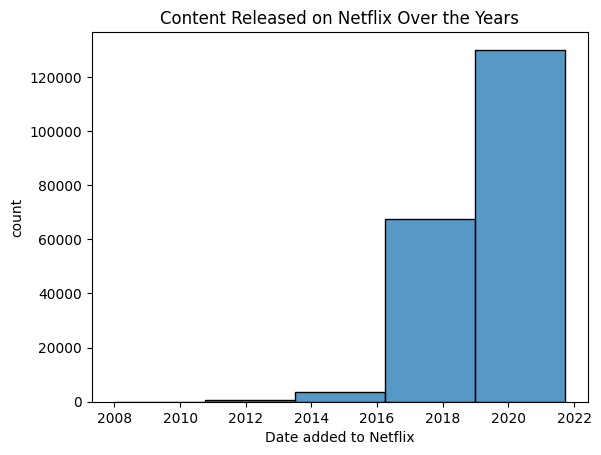

In [8]:
#Univariate analysis
plt.title("Content Released on Netflix Over the Years")
plt.xlabel("Date added to Netflix")
plt.ylabel("count")
sns.histplot(data=main_df["date_added"], bins = 5)
plt.show()

**Most of the Contents are released after 2016**

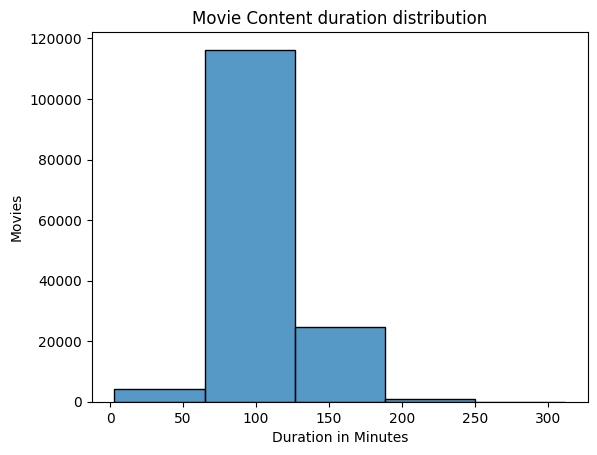

In [9]:
#Univariate analysis
plt.title("Movie Content duration distribution")
plt.xlabel("Duration in Minutes")
plt.ylabel("Movies")
sns.histplot(data=movie_df["duration"], bins = 5)
plt.show()

Most Movies Duration is around 100 mins.

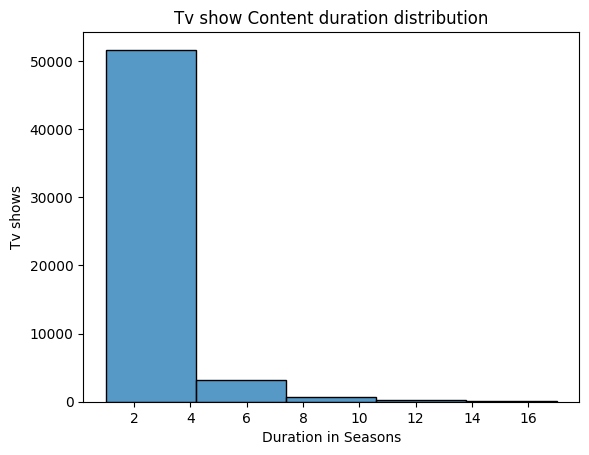

In [10]:
plt.title("Tv show Content duration distribution")
plt.xlabel("Duration in Seasons")
plt.ylabel("Tv shows")
sns.histplot(data=tv_show_df["duration"], bins = 5)
plt.show()

Most TV shows have two seasons.

To enhance viewer engagement,Suggested to launch TV shows with a greater number of seasons.

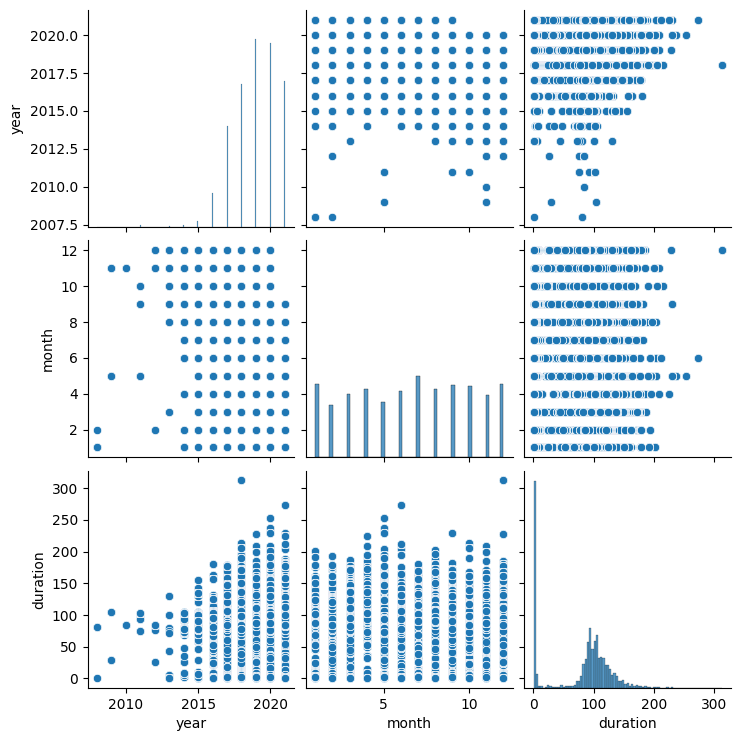

In [11]:
sns.pairplot(main_df)
plt.show()

Duration has Uptrend

In [12]:
movie_df.head()

,show_id,director,cast,country,genre,type,title,date_added,year,month,week,release_year,rating,duration
0,s1,Kirsten Johnson,David Attenborough,United States,Documentaries,Movie,Dick Johnson Is Dead,2021-09-25,2021,9,38,2020-01-01,PG-13,90
159,s7,Robert Cullen,Vanessa Hudgens,United States,Children & Family Movies,Movie,My Little Pony: A New Generation,2021-09-24,2021,9,38,2021-01-01,PG,91
160,s7,Robert Cullen,Kimiko Glenn,United States,Children & Family Movies,Movie,My Little Pony: A New Generation,2021-09-24,2021,9,38,2021-01-01,PG,91
161,s7,Robert Cullen,James Marsden,United States,Children & Family Movies,Movie,My Little Pony: A New Generation,2021-09-24,2021,9,38,2021-01-01,PG,91
162,s7,Robert Cullen,Sofia Carson,United States,Children & Family Movies,Movie,My Little Pony: A New Generation,2021-09-24,2021,9,38,2021-01-01,PG,91


In [13]:
#Bivariate Analysis
bx_df = movie_df[["show_id","genre","duration"]].drop_duplicates()
bx_df

,show_id,genre,duration
0,s1,Documentaries,90
159,s7,Children & Family Movies,91
179,s8,Dramas,125
180,s8,Independent Movies,125
181,s8,International Movies,125
...,...,...,...
201795,s8806,Children & Family Movies,88
201796,s8806,Comedies,88
201813,s8807,Dramas,111
201814,s8807,International Movies,111


<ipython-input-14-622df1748546>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bx_df, x="genre",y="duration", palette = "Set3")


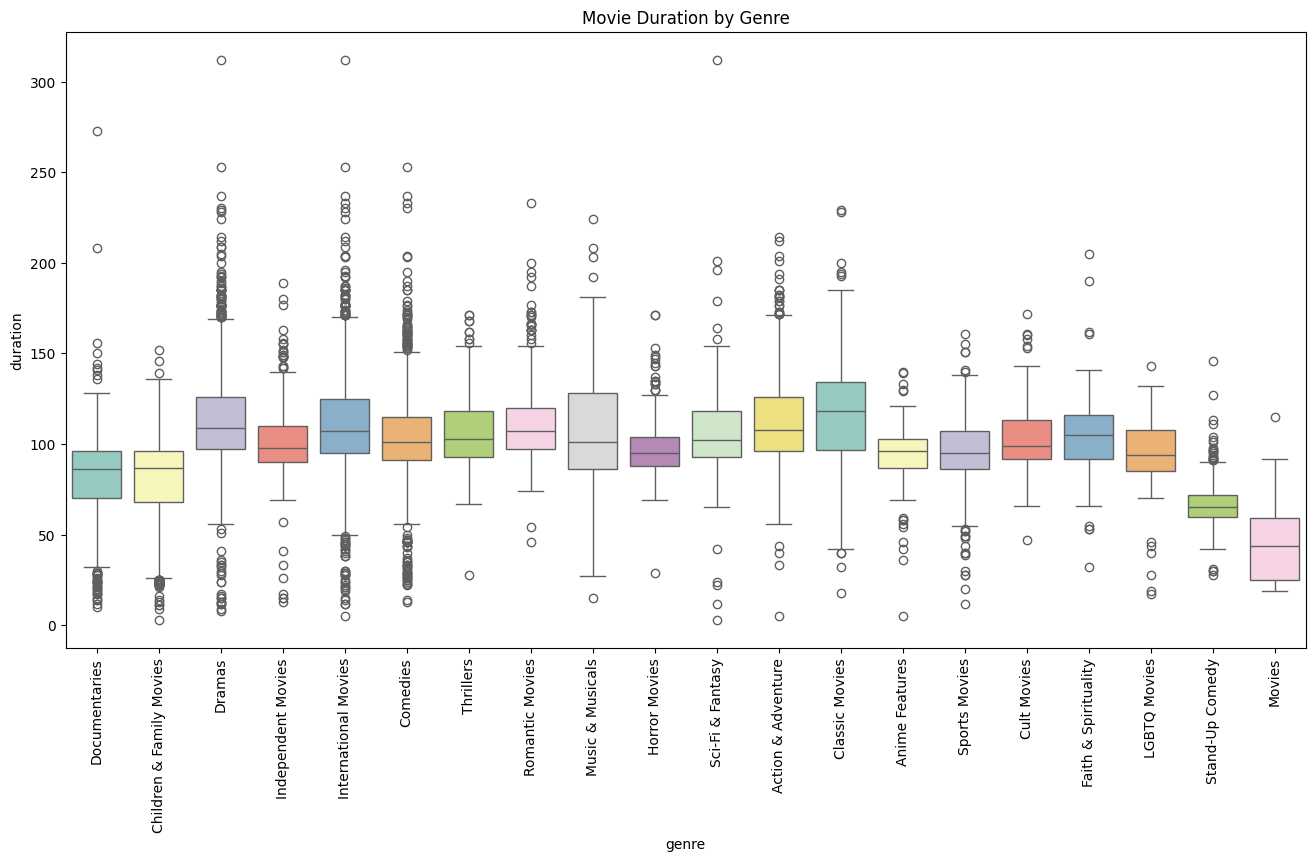

In [14]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
sns.boxplot(data=bx_df, x="genre",y="duration", palette = "Set3")
plt.title("Movie Duration by Genre")
plt.show()

Classic Movies has the more number of hours.

In [15]:
bx_df1 = tv_show_df[["show_id","genre","duration"]].drop_duplicates()
bx_df1

,show_id,genre,duration
1,s2,International TV Shows,2
2,s2,TV Dramas,2
3,s2,TV Mysteries,2
58,s3,Crime TV Shows,1
59,s3,International TV Shows,1
...,...,...,...
201686,s8801,Romantic TV Shows,1
201687,s8801,TV Dramas,1
201778,s8804,Kids' TV,2
201779,s8804,Korean TV Shows,2


<ipython-input-16-92cbdace1f15>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bx_df1, x="genre",y="duration", palette = "Set3")


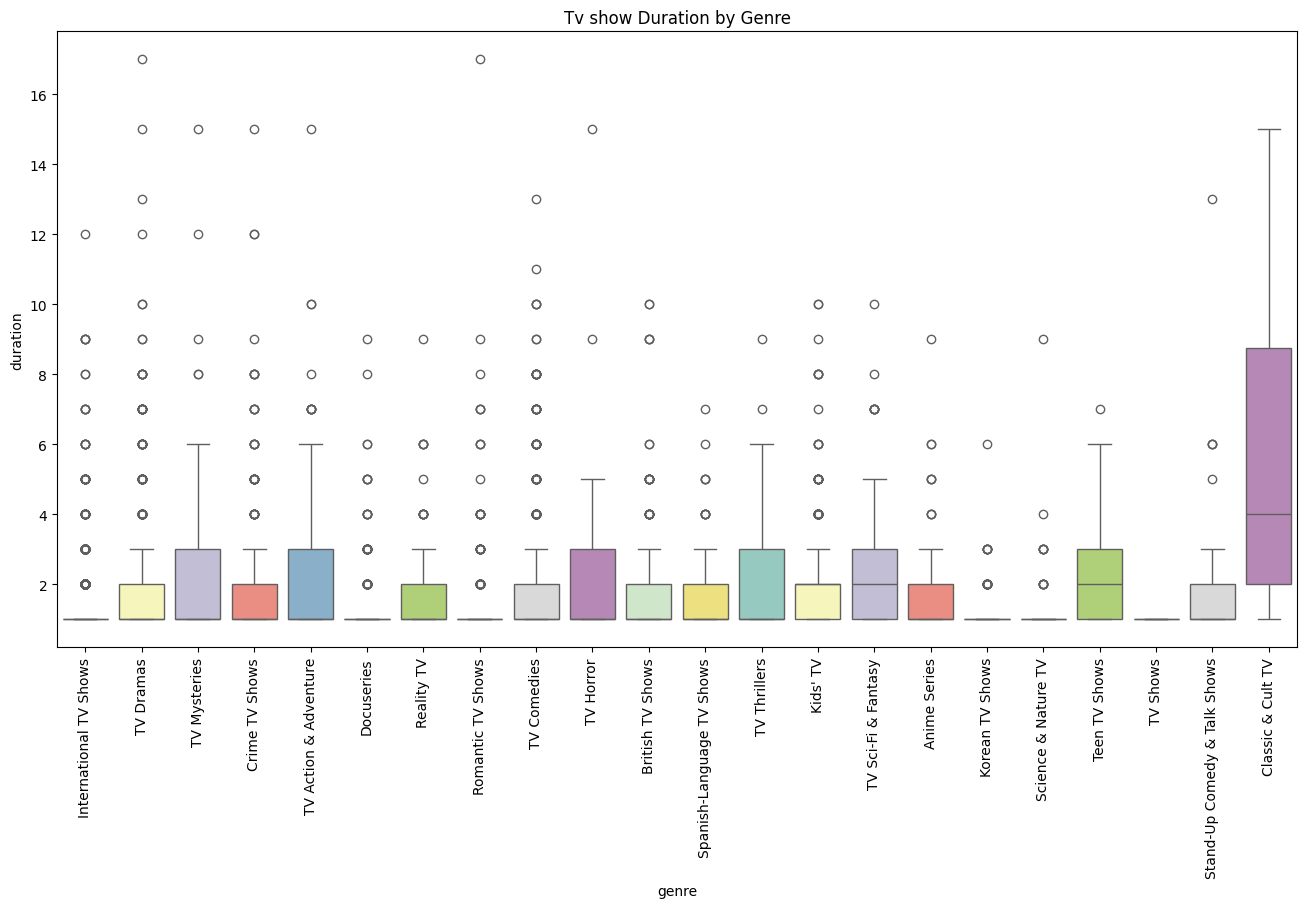

In [16]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
sns.boxplot(data=bx_df1, x="genre",y="duration", palette = "Set3")
plt.title("Tv show Duration by Genre")
plt.show()

In the Tv show most of the people are enjoing watching

Classic & Cult TV Genre

In [17]:
main_df.head()

,show_id,director,cast,country,genre,type,title,date_added,year,month,week,release_year,rating,duration
0,s1,Kirsten Johnson,David Attenborough,United States,Documentaries,Movie,Dick Johnson Is Dead,2021-09-25,2021,9,38,2020-01-01,PG-13,90
1,s2,Rajiv Chilaka,Ama Qamata,South Africa,International TV Shows,TV Show,Blood & Water,2021-09-24,2021,9,38,2021-01-01,TV-MA,2
2,s2,Rajiv Chilaka,Ama Qamata,South Africa,TV Dramas,TV Show,Blood & Water,2021-09-24,2021,9,38,2021-01-01,TV-MA,2
3,s2,Rajiv Chilaka,Ama Qamata,South Africa,TV Mysteries,TV Show,Blood & Water,2021-09-24,2021,9,38,2021-01-01,TV-MA,2
4,s2,Rajiv Chilaka,Khosi Ngema,South Africa,International TV Shows,TV Show,Blood & Water,2021-09-24,2021,9,38,2021-01-01,TV-MA,2


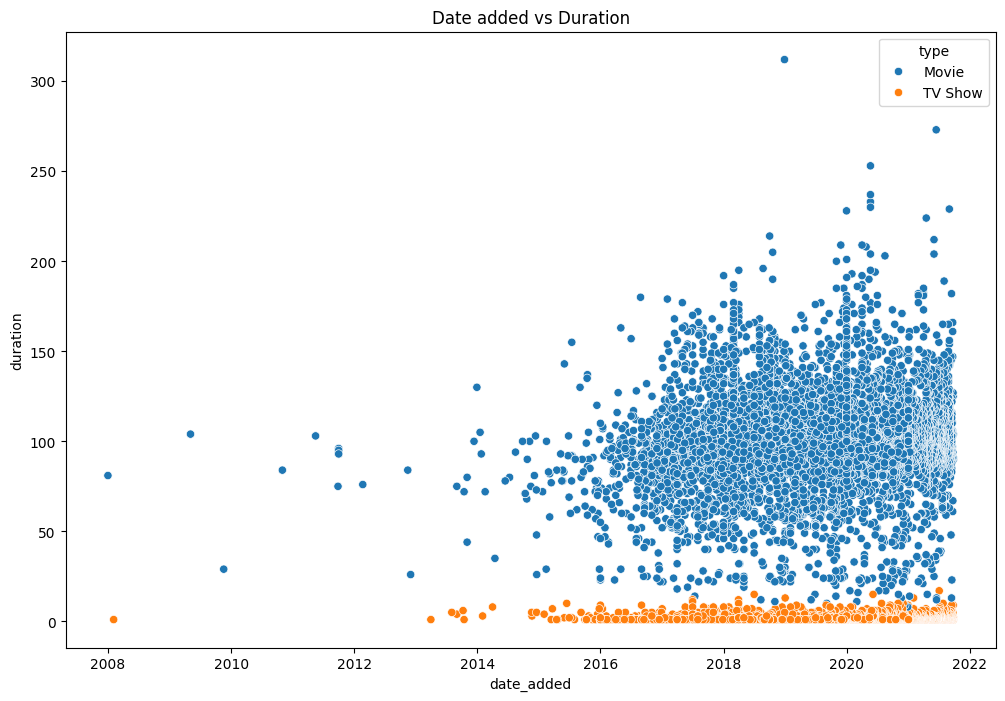

In [18]:
sct_plt_df = main_df[["show_id","date_added","type","duration"]].drop_duplicates()

plt.figure(figsize=(12,8))

sns.scatterplot(data = sct_plt_df, x = "date_added", y = "duration",hue = "type")
plt.title("Date added vs Duration")
plt.show()

**Type of content available in different countries**

In [19]:
df_1 = main_df[["show_id","type","year","month"]].drop_duplicates()
df_1.groupby(by=["type"]).size().reset_index(name="count")

,type,count
0,Movie,6126
1,TV Show,2664


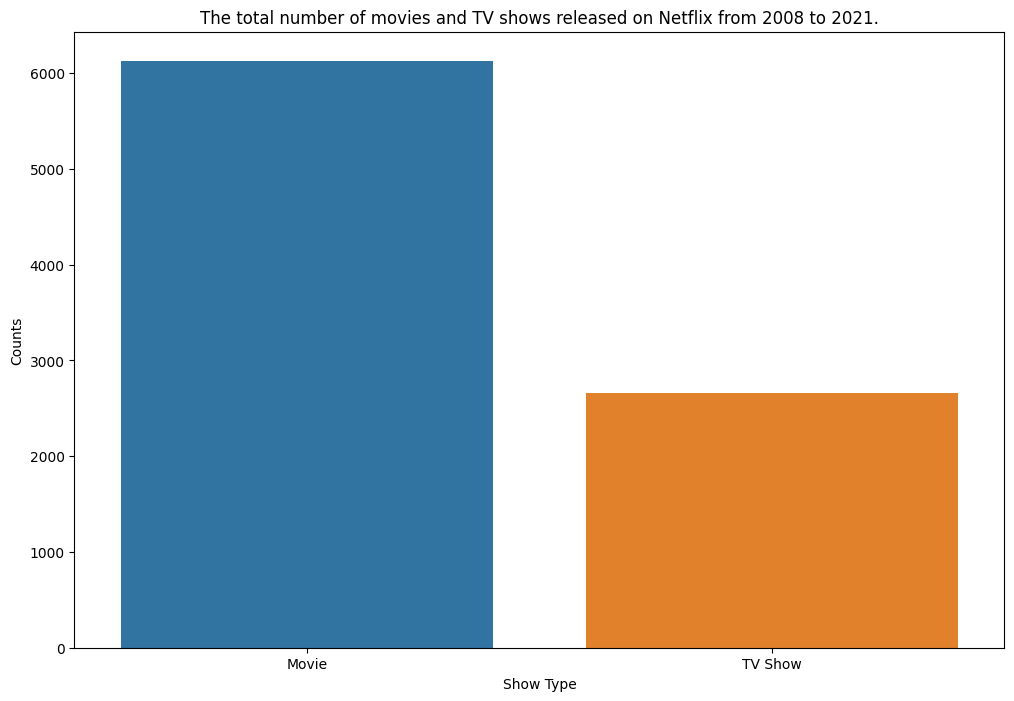

In [20]:
plt.figure(figsize=(12,8))
plt.title("The total number of movies and TV shows released on Netflix from 2008 to 2021.")
plt.xlabel("Show Type")
plt.ylabel("Counts")
sns.countplot(data = df_1, x = "type",hue="type")
plt.show()

In [21]:
df_year = df_1.groupby(by=["type","year"]).size().reset_index(name = "count")
df_year

,type,year,count
0,Movie,2008,1
1,Movie,2009,2
2,Movie,2010,1
3,Movie,2011,13
4,Movie,2012,3
5,Movie,2013,6
6,Movie,2014,19
7,Movie,2015,56
8,Movie,2016,251
9,Movie,2017,836


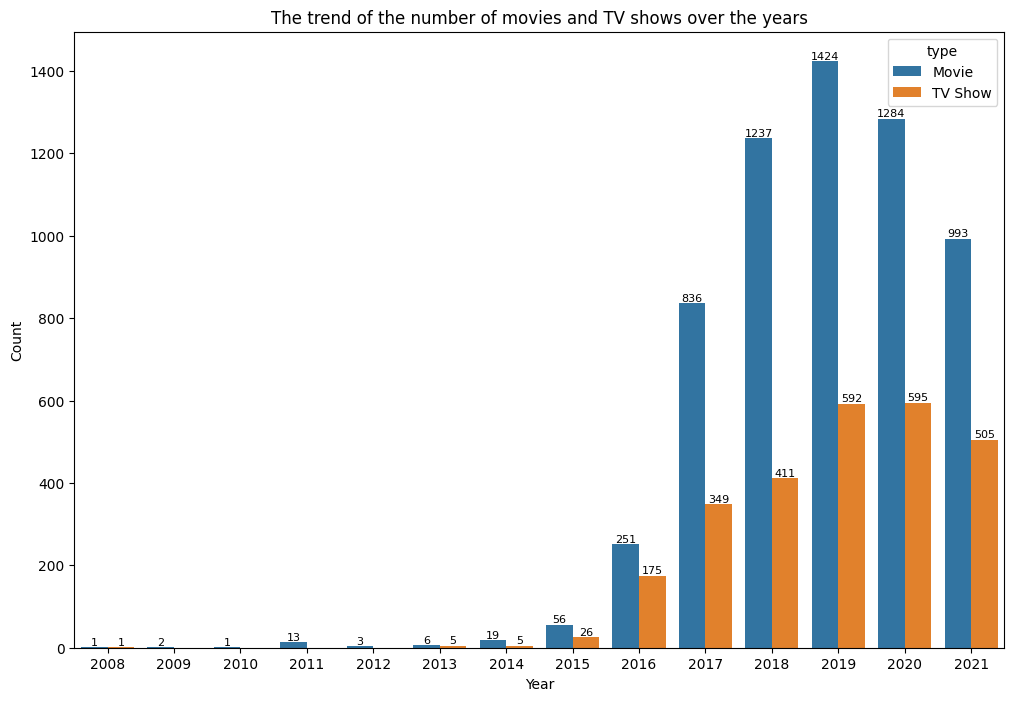

In [22]:
plt.figure(figsize=(12,8))
plt.title("The trend of the number of movies and TV shows over the years")
plt.xlabel("Year")
plt.ylabel("Count")

ax = sns.barplot(df_year,x="year",y="count",hue="type")

for container in ax.containers:
  ax.bar_label(container,fontsize=8)

plt.show()

Movies / TV shows released on netflix started in the year of 2008

In recent years, particularly since 2019, the number of movies and TV shows released has been gradually decreasing,
which could significantly impact customer retention.

To enhance business performance, it is crucial to release more engaging content. Increasing the number of releases will help attract and retain a larger audience.

In [23]:
df_2 = movie_df[["show_id","country"]].drop_duplicates()
df_2 = df_2.groupby("country").size().reset_index(name="Movie_count")
df_2 = df_2.sort_values("Movie_count",ascending=False)
df_2 = df_2.head(10)
df_2

,country,Movie_count
110,United States,3188
41,India,962
109,United Kingdom,534
18,Canada,319
32,France,303
34,Germany,182
97,Spain,171
49,Japan,119
21,China,114
63,Mexico,111


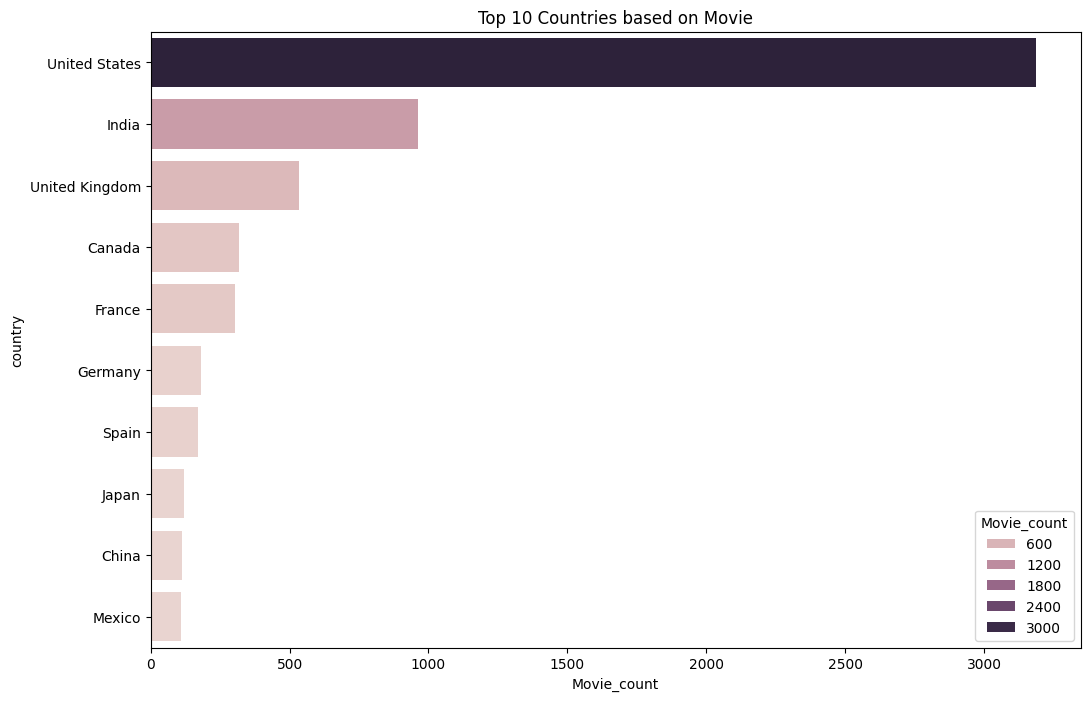

In [24]:
plt.figure(figsize=(12,8))
plt.title("Top 10 Countries based on Movie")
sns.barplot(df_2,x="Movie_count",y="country", hue="Movie_count")
plt.show()

Insights:
Most of the Movie content on Netflix originates from the U.S.
While the top 20 countries based on available content are significant,

Suggestion : it is essential to expand our focus to other countries to achieve global success.

In [25]:
df_21 = tv_show_df[["show_id","country"]].drop_duplicates()
df_21 = df_21.groupby("country").size().reset_index(name="tv_show_count")
df_21 = df_21.sort_values("tv_show_count",ascending=False)
df_21 = df_21.head(10)
df_21

,country,tv_show_count
62,United States,1322
61,United Kingdom,271
29,Japan,197
51,South Korea,170
7,Canada,126
18,France,90
24,India,84
56,Taiwan,70
1,Australia,64
52,Spain,61


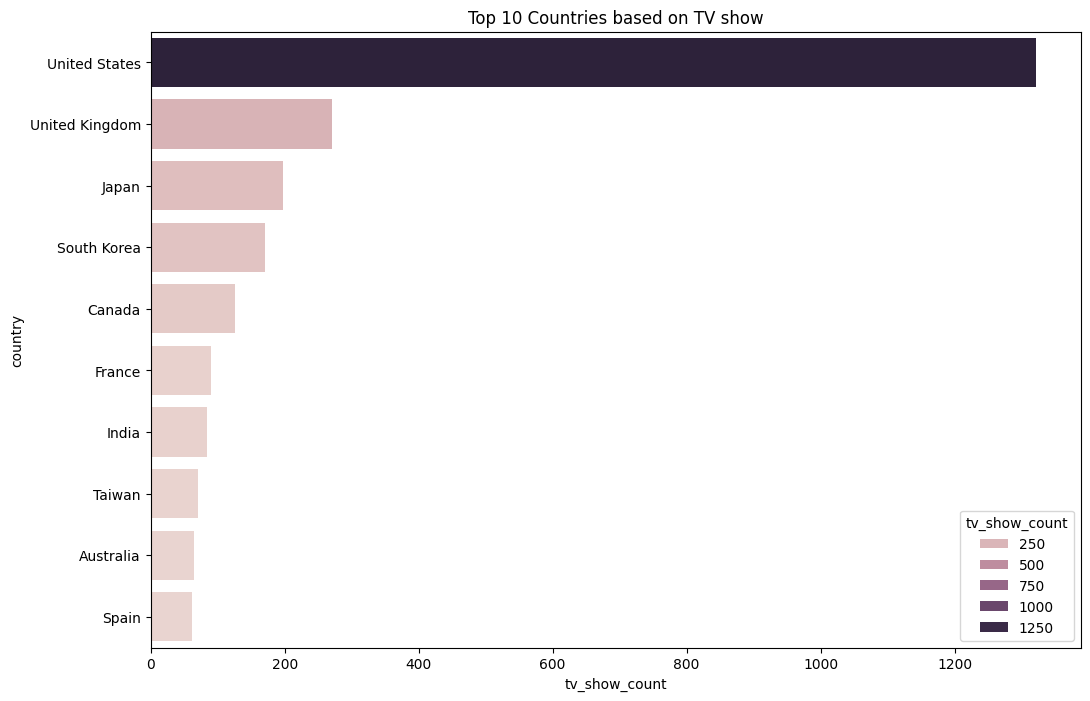

In [26]:
plt.figure(figsize=(12,8))
plt.title("Top 10 Countries based on TV show")
sns.barplot(df_21,x="tv_show_count",y="country", hue="tv_show_count")
plt.show()

Insights:
Most of the Tv shows content on Netflix originates from the U.S.
While the top 20 countries based on available content are significant,

Suggestion : it is essential to expand our focus to other countries to achieve global success.

In [27]:
df_3 = main_df[["show_id","director"]].drop_duplicates()
df_3 = df_3.groupby("director").size().reset_index(name="directed_contents")
df_3 = df_3.sort_values("directed_contents",ascending=False)
df_3 = df_3.head(10)
df_3

,director,directed_contents
3747,Rajiv Chilaka,2643
1905,Jan Suter,21
3798,Raúl Campos,19
2864,Marcus Raboy,16
4455,Suhas Kadav,16
1953,Jay Karas,15
754,Cathy Garcia-Molina,13
1950,Jay Chapman,12
2943,Martin Scorsese,12
4939,Youssef Chahine,12


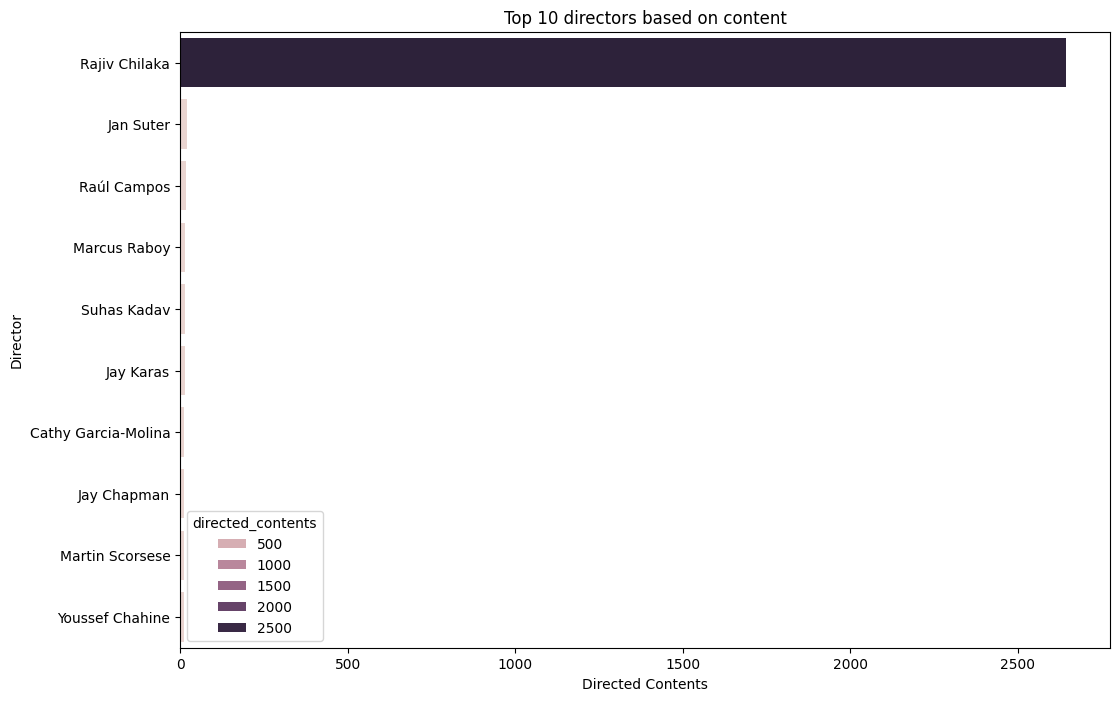

In [28]:
plt.figure(figsize=(12,8))
plt.title("Top 10 directors based on content")
plt.xlabel("Directed Contents")
plt.ylabel("Director")
sns.barplot(df_3,x="directed_contents",y="director", hue="directed_contents")
plt.show()

Top 10 directos appeared in most of the movies

In [29]:
df_4 = main_df[["show_id","cast"]].drop_duplicates()
df_4

,show_id,cast
0,s1,David Attenborough
1,s2,Ama Qamata
4,s2,Khosi Ngema
7,s2,Gail Mabalane
10,s2,Thabang Molaba
...,...,...
201822,s8807,Manish Chaudhary
201825,s8807,Meghna Malik
201828,s8807,Malkeet Rauni
201831,s8807,Anita Shabdish


In [30]:
df_4 = df_4.groupby("cast").size().reset_index(name="count")
df_4 = df_4.sort_values("count",ascending=False)
df_4 = df_4.head(10)
df_4

,cast,count
7817,David Attenborough,845
2825,Anupam Kher,43
30448,Shah Rukh Khan,35
16672,Julie Tejwani,33
32548,Takahiro Sakurai,32
24182,Naseeruddin Shah,32
28933,Rupa Bhimani,31
845,Akshay Kumar,30
25388,Om Puri,30
35834,Yuki Kaji,29


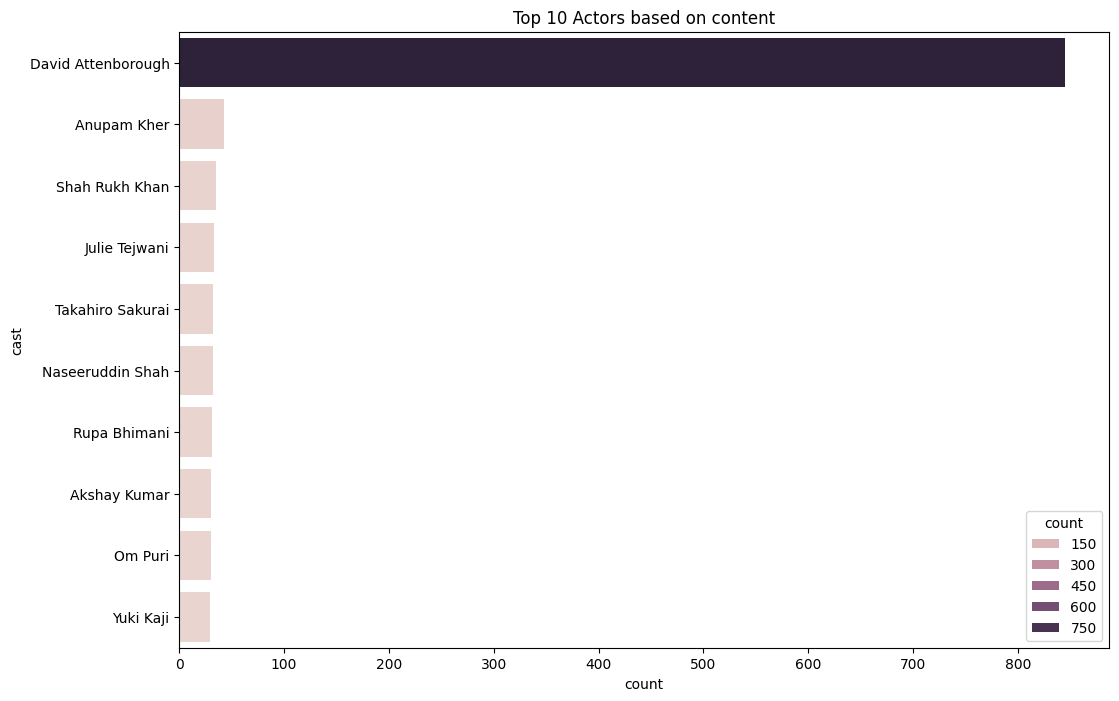

In [31]:
plt.figure(figsize=(12,8))
plt.title("Top 10 Actors based on content")
sns.barplot(df_4,x="count",y="cast", hue="count")
plt.show()

Top 10 actors based on the appearance of tv shows

**Weekly Analysis**

**Best week with highest number of release Movie | TV shows**

In [32]:
df_61 = tv_show_df[["show_id","year","week"]].drop_duplicates()
df_61 = df_61.groupby("week")["show_id"].size().reset_index(name = "count")
df_61 = df_61.sort_values("count",ascending=False)
df_61.head(10)

,week,count
39,39,94
31,31,86
26,26,84
13,13,83
27,27,82
50,50,77
35,35,73
24,24,72
48,48,68
17,17,68


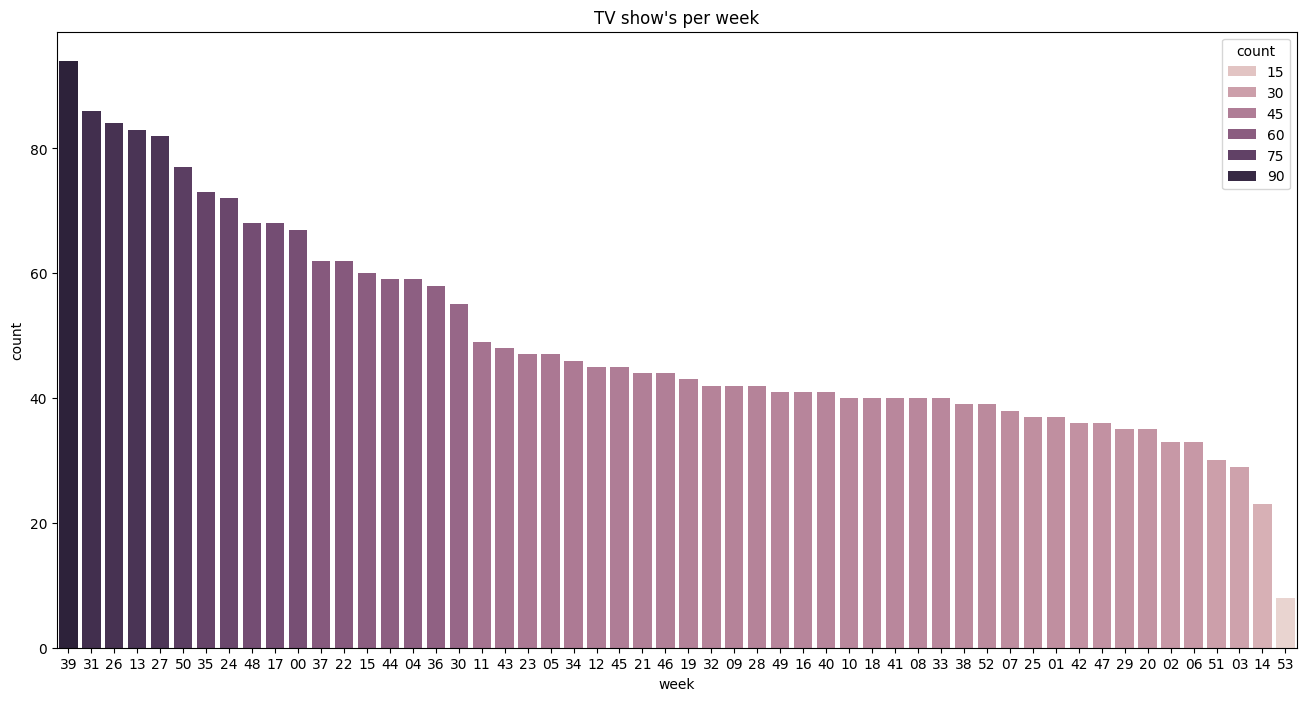

In [33]:
plt.figure(figsize=(16,8))
plt.title("TV show's per week")
sns.barplot(df_61, x = "week", y = "count", hue="count")
plt.show()

Insights:
Data indicates that the 39th week of the year is best for releasing TV shows, as it likely maximizes viewership and engagement.


In [34]:
df_62 = movie_df[["show_id","week"]].drop_duplicates()
df_62 = df_62.value_counts("week").reset_index()
df_62.head()

,week,count
0,00,251
1,39,241
2,26,234
3,13,231
4,43,204


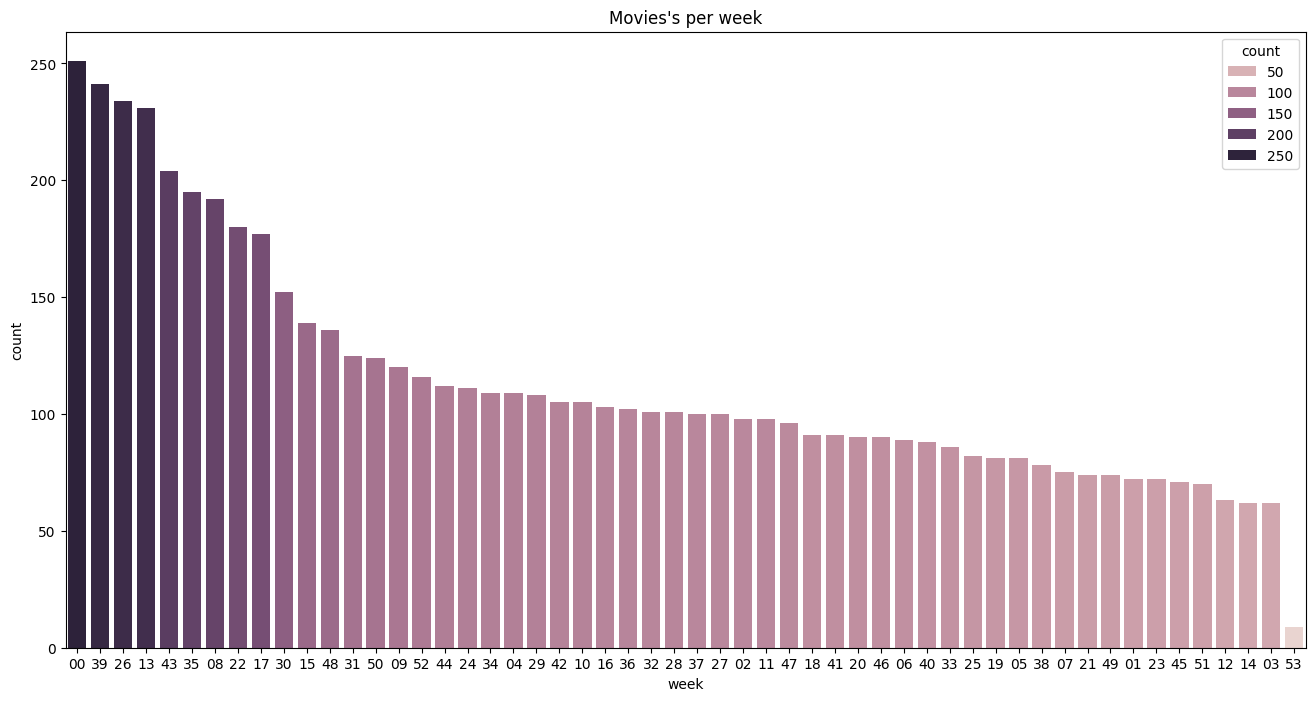

In [35]:
plt.figure(figsize=(16,8))
plt.title("Movies's per week")
sns.barplot(df_62, x = "week", y = "count", hue="count")
plt.show()

The data suggests that the 1st week of the year, during the New Year period, is the best time to release movies, as it tends to attract higher audience engagement.

In [36]:
df_month = df_1.groupby(by=["type","month"]).size().reset_index(name = "count")
df_month

,type,month,count
0,Movie,1,545
1,Movie,2,382
2,Movie,3,528
3,Movie,4,549
4,Movie,5,439
5,Movie,6,492
6,Movie,7,565
7,Movie,8,518
8,Movie,9,518
9,Movie,10,545


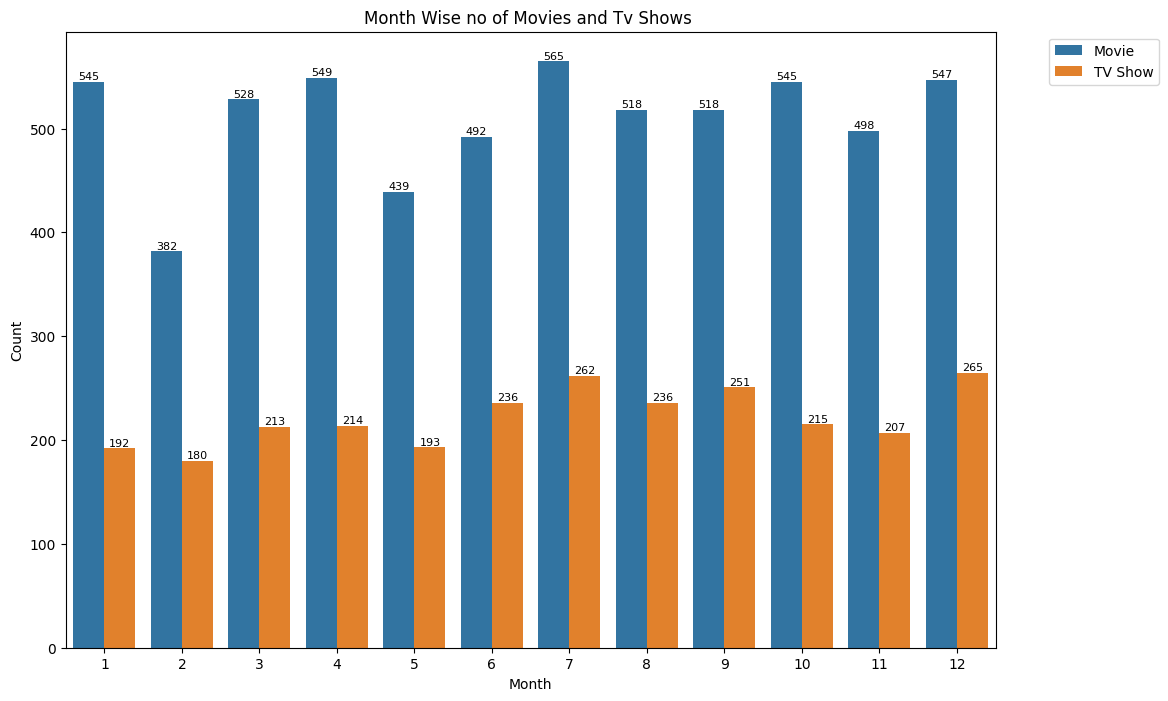

In [37]:
plt.figure(figsize=(12,8))
plt.title("Month Wise no of Movies and Tv Shows ")
plt.xlabel("Month")
plt.ylabel("Count")
ax = sns.barplot(df_month,x="month",y="count",hue="type")

for container in ax.containers:
  ax.bar_label(container,fontsize=8)

plt.legend(bbox_to_anchor = (1.05,1.0),loc="upper left")

plt.show()

In [38]:
df_7 = movie_df[["show_id","month"]].drop_duplicates()
df_7 = df_7.value_counts("month").reset_index()
df_7 = df_7.sort_values("count",ascending=False)
df_7

,month,count
0,7,565
1,4,549
2,12,547
3,1,545
4,10,545
5,3,528
6,8,518
7,9,518
8,11,498
9,6,492


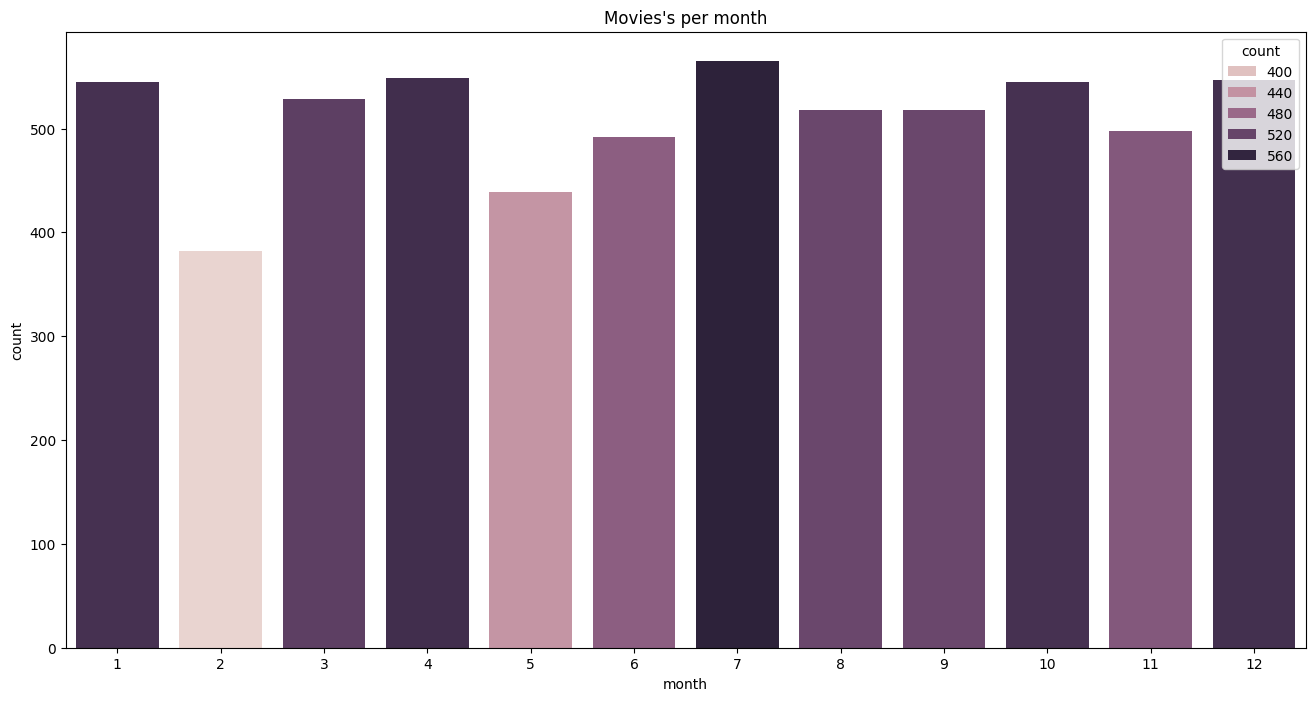

In [39]:
plt.figure(figsize=(16,8))
plt.title("Movies's per month")
sns.barplot(df_7, x = "month", y = "count", hue="count")
plt.show()

July is identified as the best month to release a movie, offering the highest potential for audience engagement.

In [40]:
df_71 = tv_show_df[["show_id","month"]].drop_duplicates()
df_71 = df_71.value_counts("month").reset_index()
df_71= df_71.sort_values("count",ascending=False)
df_71

,month,count
0,12,265
1,7,262
2,9,251
3,6,236
4,8,236
5,10,215
6,4,214
7,3,213
8,11,207
9,5,193


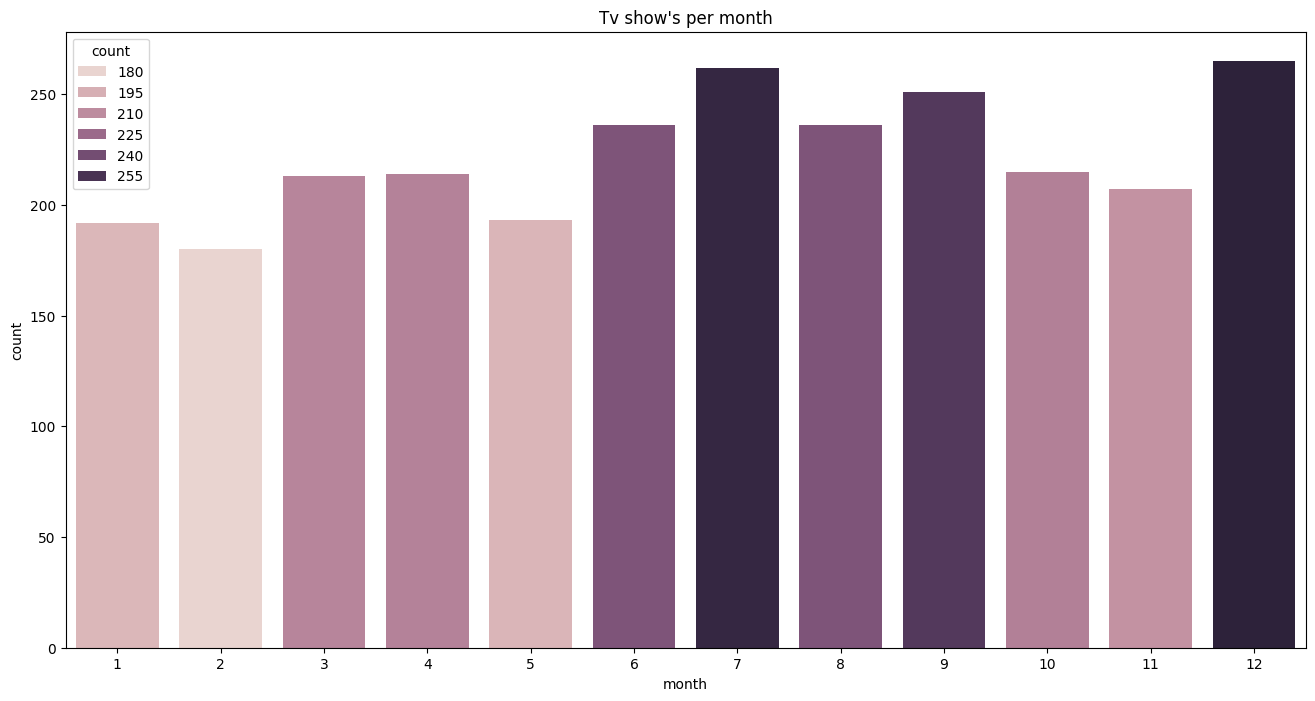

In [41]:
plt.figure(figsize=(16,8))
plt.title("Tv show's per month")
sns.barplot(df_71, x = "month", y = "count", hue="count")
plt.show()

December, during the Christmas season, is the best month to release TV shows, as it aligns with peak audience engagement.

In [42]:
df_5 = main_df[["show_id","genre"]].drop_duplicates()
df_5 = df_5.groupby("genre").size().reset_index(name="shows")
df_5 = df_5.sort_values("shows",ascending=False)
df_5.head(10)

,genre,shows
16,International Movies,2752
12,Dramas,2426
7,Comedies,1674
17,International TV Shows,1349
10,Documentaries,869
0,Action & Adventure,859
34,TV Dramas,762
15,Independent Movies,756
4,Children & Family Movies,641
24,Romantic Movies,616


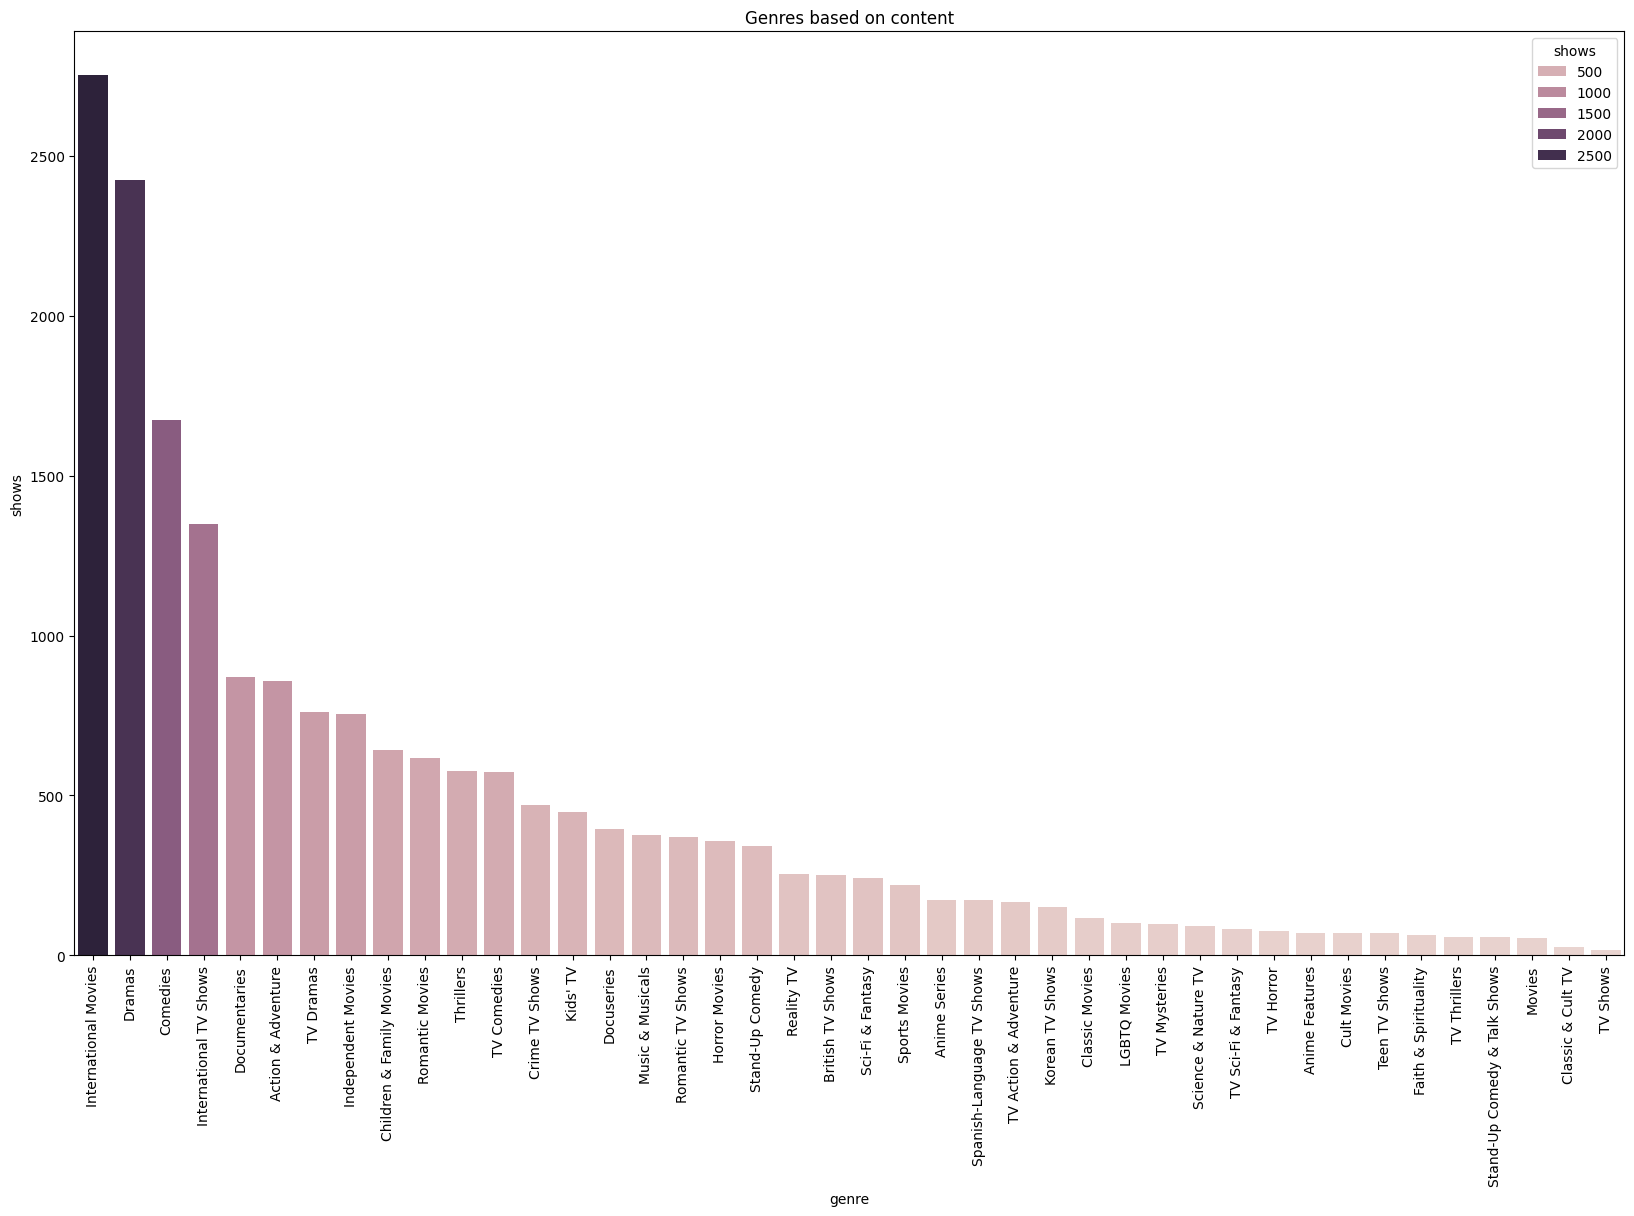

In [43]:
plt.figure(figsize=(20,12))
plt.title("Genres based on content")
plt.xticks(rotation=90)
sns.barplot(df_5,x="genre",y="shows", hue="shows")
plt.show()

In [44]:
#Best geners in movies
df_51 = movie_df[["show_id","genre"]].drop_duplicates()
df_51 = df_51.value_counts("genre").reset_index()
df_51

,genre,count
0,International Movies,2752
1,Dramas,2426
2,Comedies,1674
3,Documentaries,869
4,Action & Adventure,859
5,Independent Movies,756
6,Children & Family Movies,641
7,Romantic Movies,616
8,Thrillers,577
9,Music & Musicals,375


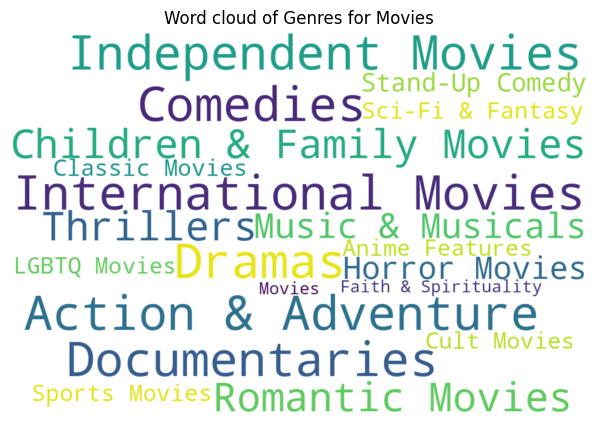

In [45]:
#word cloud, graph
mov_genre_counts = dict(zip(df_51["genre"],df_51["count"]))

# mov_genre_counts
wordcloud = WordCloud(width= 1200, height = 800, background_color="white",relative_scaling=0,normalize_plurals=False).generate_from_frequencies(mov_genre_counts)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.title("Word cloud of Genres for Movies")

plt.show()

In [46]:
#Best genres in TV shows
df_52 = tv_show_df[["show_id","genre"]].drop_duplicates()
df_52 = df_52.value_counts("genre").reset_index()
df_52

,genre,count
0,International TV Shows,1349
1,TV Dramas,762
2,TV Comedies,573
3,Crime TV Shows,469
4,Kids' TV,448
5,Docuseries,394
6,Romantic TV Shows,370
7,Reality TV,255
8,British TV Shows,252
9,Anime Series,174


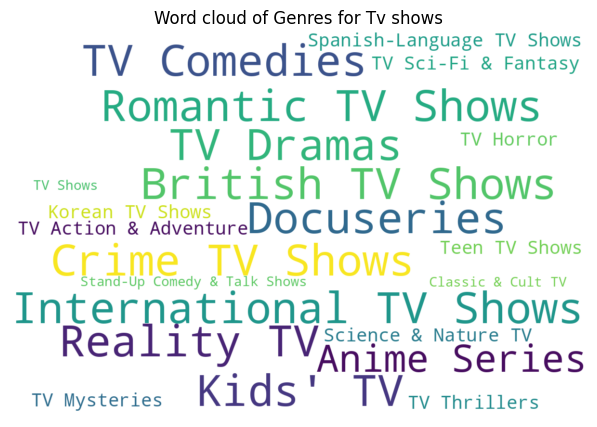

In [47]:
#word cloud, graph
tv_show_genre_counts = dict(zip(df_52["genre"],df_52["count"]))

# mov_genre_counts

wordcloud = WordCloud(width= 1200, height = 800, background_color="white",relative_scaling=0,normalize_plurals=False).generate_from_frequencies(tv_show_genre_counts)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.title("Word cloud of Genres for Tv shows")

plt.show()

international TV shows is the best performing genre

In [48]:
#Release year do not have the exact date, assuming the release of jan 1 for every year

In [49]:
df_81 = movie_df[["show_id","year","date_added","release_year"]].drop_duplicates()
df_81["diff_days"]=(df_81["date_added"]-df_81["release_year"]).dt.days
df_81

,show_id,year,date_added,release_year,diff_days
0,s1,2021,2021-09-25,2020-01-01,633
159,s7,2021,2021-09-24,2021-01-01,266
179,s8,2021,2021-09-24,1993-01-01,10493
331,s10,2021,2021-09-24,2021-01-01,266
431,s13,2021,2021-09-23,2021-01-01,265
...,...,...,...,...,...
201712,s8802,2016,2016-03-09,2015-01-01,433
201748,s8803,2019,2019-11-20,2007-01-01,4706
201781,s8805,2019,2019-11-01,2009-01-01,3956
201795,s8806,2020,2020-01-11,2006-01-01,5123


In [50]:
df_81["diff_days"].mode()[0]

334

The mode of days taken to add movies to Netflix after their release is : 334 days




Suggestion: to release as soon as it releases on real life. to increase the user base to stick around netflix

In [51]:
df_82 = tv_show_df[["show_id","date_added","release_year"]].drop_duplicates()
df_82["diff_days"]=(df_82["date_added"]-df_82["release_year"]).dt.days
df_82

,show_id,date_added,release_year,diff_days
1,s2,2021-09-24,2021-01-01,266
58,s3,2021-09-24,2021-01-01,266
85,s4,2021-09-24,2021-01-01,266
87,s5,2021-09-24,2021-01-01,266
111,s6,2021-09-24,2021-01-01,266
...,...,...,...,...
201555,s8796,2018-05-01,2015-01-01,1216
201575,s8797,2017-01-17,2016-01-01,382
201611,s8798,2018-09-13,2016-01-01,986
201685,s8801,2016-12-15,2012-01-01,1810


In [52]:
df_82["diff_days"].mode()[0]

364

A Netflix TV show typically takes about one year to be available on the platform after its initial release. It's recommended to shorten this time to reach a broader audience more quickly.